# Trabajo Final


In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import cv2
# Versión del TensorFlow
print(tf.__version__)

2.12.0


In [ ]:
mnist = keras.datasets.mnist

(train_digits, train_labels), (test_digits, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


## Exploración del set de datos




In [ ]:
#Labels
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [ ]:
#Prueba de printeo de clase
class_names[5]

'5'

In [ ]:
#Cantidad de imágenes con tamaño 28x28
train_digits.shape

(60000, 28, 28)

In [ ]:
#Cantidad de imágenes
len(train_labels)

60000

In [ ]:
#Imágenes en función de las etiquetas
print(train_labels)

[5 0 4 ... 5 6 8]


In [ ]:
#Inicializar cada label en la primer imágen
class_count = [0]*10
print(class_count)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
  #Total de imágenes por label
for i in train_labels:
  class_count[int(i)] += 1
print(class_count)


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


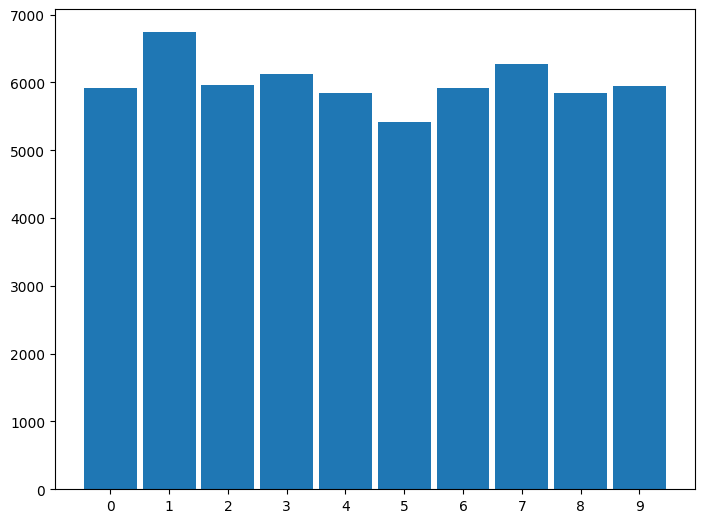

In [ ]:
#Gráfico de los labels en función de la cantidad
n_bins = 10
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
X = np.arange(n_bins)
ax.bar(X,class_count,width = 0.9, label='Clases')
labels = [item.get_text() for item in ax.get_xticklabels()]
plt.xticks(X)
plt.show()

In [ ]:
#Cada etiqueta es un entero
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
#Hay 10000 imágenes en el set de pruebas de 28x28
test_digits.shape


(10000, 28, 28)

In [ ]:
#Cada una correspondida por su etiqueta
len(test_labels)

10000

#Pre-proceso del dataset

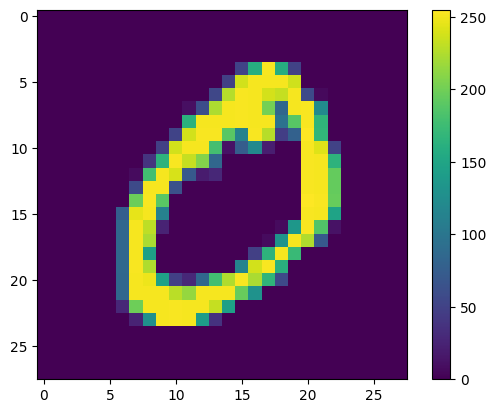

In [ ]:
#Visualizamos una imagen
plt.figure()
plt.imshow(train_digits[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Escalado de imágenes 0 a 1
train_digits = train_digits / 255.0
test_digits = test_digits / 255.0

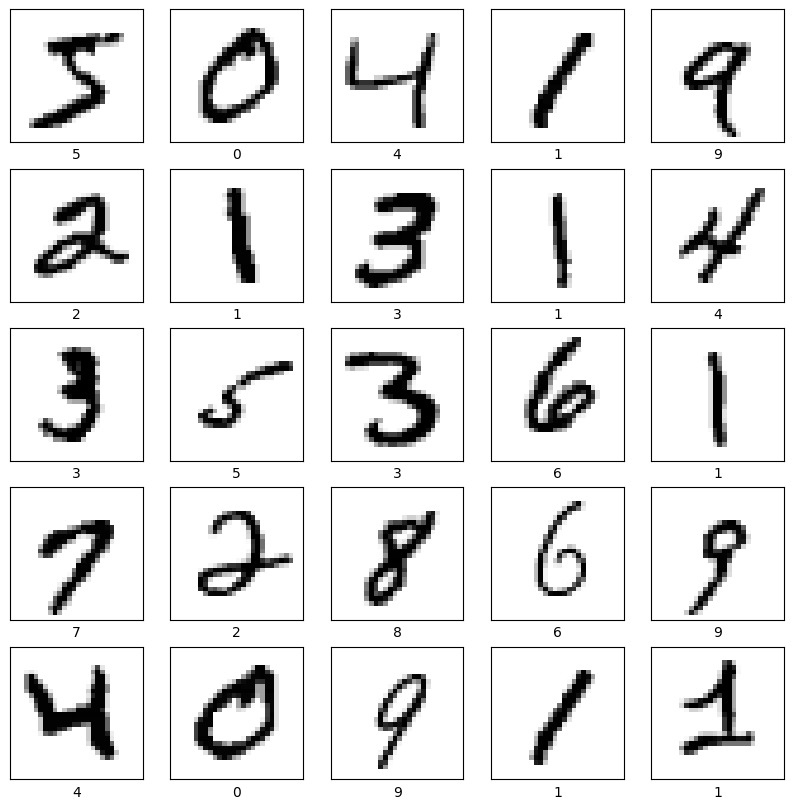

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_digits[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Construcción del Modelo Lógico

*   Flatten -> Convierte la matriz(tamaño de imágen 28px28p) en un arreglo(784p)
*   Dense 1 -> Función de activación tipo relu con 128 neuronas.
*   Dense 2 -> Función de activación tipo softmax con 10 neuronas.
 *  Devuelve un arreglo de 10 prob. que suman 1.
*   Cada nodo contiene una calificación que indica la probabilidad de que la imágen actual pertenezca a una de las 10 clases.


In [ ]:
#Construcción de la red neuronal
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
#Loss function, Optimizer, Metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Entrenamiento
model.fit(train_digits, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 2ms/step - loss: 0.2529 - accuracy: 0.9279
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1104 - accuracy: 0.9671
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0764 - accuracy: 0.9771
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0578 - accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0440 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0351 - accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0277 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0217 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0202 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.01

In [ ]:
#Estimación del rendimiento del modelo sobre el set de pruebas ()
test_loss, test_acc = model.evaluate(test_digits,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0883 - accuracy: 0.9786 - 914ms/epoch - 3ms/step

Test accuracy: 0.978600025177002


In [ ]:
#Predicciones
#
predictions = model.predict(test_digits)

313/313 [==============================] - 1s 1ms/step


In [ ]:
#Prueba de predicción
predictions[0]

array([2.6443296e-09, 9.1336744e-11, 5.3459047e-08, 1.2546074e-05,
       2.6244128e-12, 5.2462541e-09, 3.9766897e-15, 9.9998713e-01,
       2.3256899e-09, 2.0769959e-07], dtype=float32)

In [ ]:
pred_label = np.argmax(predictions[0])
print(pred_label, " [", class_names[pred_label], "]", sep="")

7 [7]


In [ ]:
#Verificación de la clasificación de la red
test_labels[0]

7

In [ ]:
#Dibuja la imágen con probabilidad de clase de cada una de las imágenes
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

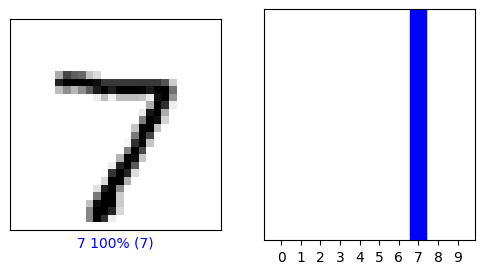

In [ ]:
#Testeo
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_digits)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

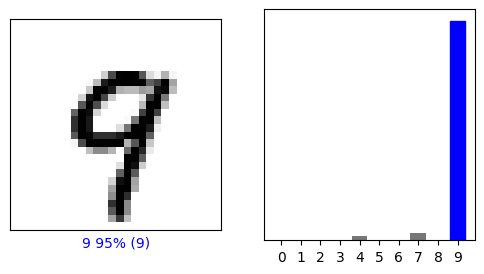

In [ ]:
#Testeo 2
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_digits)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

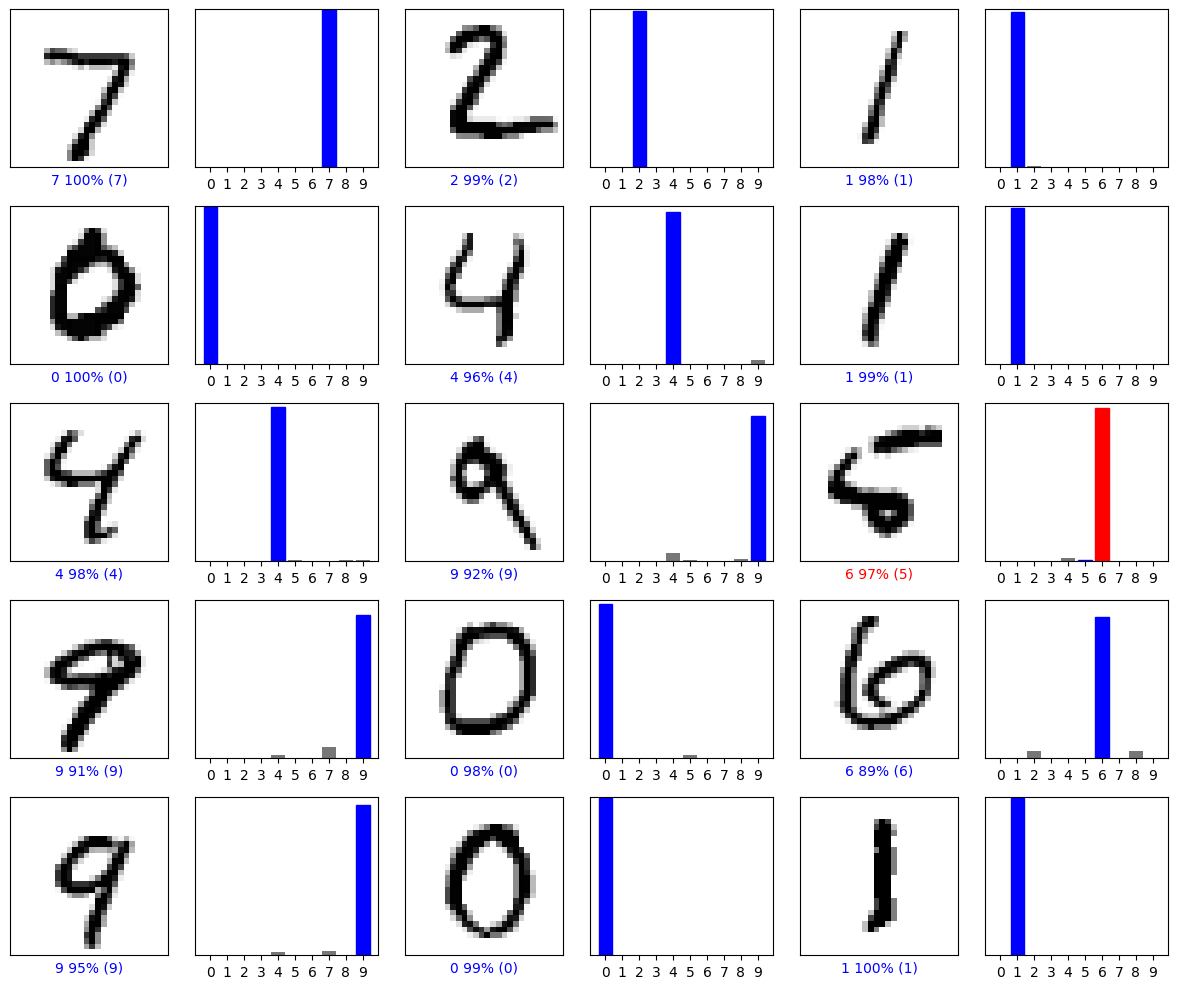

In [ ]:
#Testeo en varias imágenes
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_digits)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_digits[1]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[1.4895460e-03 1.3218626e-05 9.8785222e-01 3.5478852e-03 3.1198627e-11
  4.0076426e-03 2.2590014e-03 9.5596855e-12 8.3048240e-04 4.6319187e-10]]


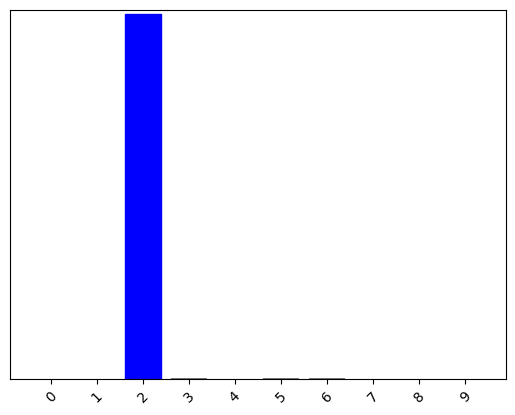

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
pred_label_single = np.argmax(predictions_single[0])
print(pred_label_single, " [", class_names[pred_label_single], "]", sep="")

2 [2]
